![test](ceg1705_logo_notebook.png)

# Practical 2: Map projection computations and coordinate transformations

## Part 1. Computations in the Ordnance Survey National Grid

*Point 1 has the following geodetic coordinates:*

$$
\varphi_{1}=52^\circ 30^\prime 45^{\prime\prime} \, \textrm{N},\\
\lambda_{1}=1^\circ 00^\prime 30^{\prime\prime} \, \textrm{W},
$$

whereas point 2 has the geodetic coordinates

$$
\varphi_{2}=52^\circ \textrm{MM}^\prime 37.25981^{\prime\prime} \, \textrm{N},\\
\lambda_{2}=2^\circ 17^\prime \textrm{DD}.47629^{\prime\prime}  \, \textrm{W}. 
$$

where DD is your day of birth and MM is your month of birth (e.g. for 23 June DD = 23 and MM = 06). Both positions are expressed on the Airy 1830 ellipsoid defined in the sheet "Constants" of the spreadsheet by its semi-major axis and its semi-minor axis.

The following cell loads the modules and utilities you need for completing the practical

In [1]:
# try:
#     import pyproj
# except ImportError:
#     %pip install -q pyproj

In [1]:
from pyproj import Proj
import numpy as np
import pycegm

ModuleNotFoundError: No module named 'pyproj'

Lets define the ellipsoid parameters in the next cell.

In [2]:
# semi-major axis a [meters]
a = 6377563.396
# semi-minor axis b [meters]
b = 6356256.909 
# true origin easting [meters]
e0 = 400000.000
# true origin northing [meters]
n0 = -100000.000
# central meridian scale
f0 = 0.999601271700
# true origin latitude [dec. degrees]
PHI0 = 49.00000000 
# true origin longitude [dec. degrees]
LAM0 = -2.00000000

In the cell below, convert Point 1 coordinates to decimal degree ✏️

In [3]:
lat_p1 = utils.dms2dd(52,30,45,'N')
lon_p1 = utils.dms2dd(1,0,30,'W')

In the cell below, convert Point 2 coordinates to decimal degrees ✏️

In [4]:
# input coordinates for points 2
lat_p2 = utils.dms2dd(52,6,37.25981,'N')
lon_p2 = utils.dms2dd(2,17,6.47629,'W')

To convert coordinates from Lat/Lon to Easting and Northing map/projected coordinates in the OS National Grid (OSGB36), we use the python module Pyproj (cartographic projections and coordinate transformations library).
The datum definition can easily be defined using the **EPSG** Geodetic Parameter Dataset is a public registry of geodetic datums, spatial reference systems, Earth ellipsoids, coordinate transformations and related units of measurement. 

Here is an example for converting the coordinates of the permanent GPS site NCAS (located in Newcastle University) to UTM easting/northing coordinates:

In [5]:
latitude = 54.979 
longitude =  -1.617
# using WGS84/UTM zone 30N EPSG code
# you can use the full proj format : 
# +proj=utm +zone=30 +datum=WGS84 +units=m +no_defs +type=crs
proj_utm = Proj("epsg:32630")
# forward conversion
easting,northing = proj_utm(longitude, latitude)
print("NCAS Easting = %f ; Northing = %f"%(easting,northing))

NCAS Easting = 588511.750736 ; Northing = 6093329.466385


<div class="alert alert-block alert-info">
<b>Q1.1</b> Convert the geodetic coordinates of points 1 and 2 to Easting and Northing map/projected coordinates in the OS National Grid. 
</div>

Use the site https://epsg.io/ to find the code for the OSGB36 / British National Grid. Then define your projection. ✏️

In [6]:
# define the reference as the OSGB national grid with Airy 1980 ellipsoid
p = Proj("epsg:27700")

Convert point 1 lon/lat to easting and northing  ✏️

In [7]:
easting_p1,northing_p1 = p(lon_p1, lat_p1)
print('Point 1: Easting =%9.3f Northing=%11.3f'%(easting_p1,northing_p1))

Point 1: Easting =467290.942 Northing= 291015.056


 Convert point 1 lon/lat to easting and northing ✏️

In [8]:
easting_p2,northing_p2 = p(lon_p2, lat_p2)
print('Point 1: Easting =%9.3f Northing=%11.3f'%(easting_p2,northing_p2))

Point 1: Easting =380475.576 Northing= 245864.555


<div class="alert alert-block alert-info">
<b>Q1.2</b> Find the line scale factor and the ellipsoidal distance between points 1 and 2.
</div>

The module `utils` provides you with a function to calculate the point scale factor called `E_N_to_LSF`. An example of how to use this function: 
```
scale_factor = utils.E_N_to_LSF(easting,northing,a, b, e0, n0, f0, PHI0)
```
The ellipsoid parameters a,b,e0,n0,f0 and PHI0 have been already defined above. Use the cell below to do your calculation.

In [9]:
local_scale_factor_p1 = utils.E_N_to_LSF(easting_p1,northing_p1,a, b, e0, n0, f0, PHI0)
print(local_scale_factor_p1)

0.9996568623194224


In [10]:
local_scale_factor_p2 = utils.E_N_to_LSF(easting_p2,northing_p2,a, b, e0, n0, f0, PHI0)
print(local_scale_factor_p2)

0.9996059520780486


In [11]:
# using simpson's rule
line_scale_factor_p1p2 = (local_scale_factor_p1+local_scale_factor_p2)/2
print('Line Scale factor for the line between P1 and P2 = %f'%line_scale_factor_p1p2)

Line Scale factor for the line between P1 and P2 = 0.999631


Now, we can calculate the ellipsoidal distance between points 1 and 2.

In [12]:
# The projected distance
distance_p1p2 = np.sqrt((easting_p1-easting_p2)**2+(northing_p1-northing_p2)**2)

Given $m = \dfrac{d\ell'}{d\ell}$, then the ellipsoidal distance can be derived as
$d\ell = \dfrac{d\ell'}{m}$

In [13]:
distance_ellip = distance_p1p2/line_scale_factor_p1p2
print("The ellipsoidal distance is %f [meters]:"%distance_ellip)

The ellipsoidal distance is 97890.440293 [meters]:


Consider points 3, 4, and 5 with the following map/projected coordinates:

$$
E_3=35\textrm{MMDD} \, \textrm{m}, \\
N_3=551278 \, \textrm{m},
$$

$$
E_4=346145 \, \textrm{m}, \\
N_4=57\textrm{DDMM} \, \textrm{m},
$$

$$
E_5=345000 \, \textrm{m}, \\
N_5=580000 \, \textrm{m}.
$$

Use the cell below to input your coordinates of points 3 to 5.

In [14]:
easting_p3,northing_p3 = 350606,551278
easting_p4,northing_p4 = 346145,570606
easting_p5,northing_p5 = 345000,580000

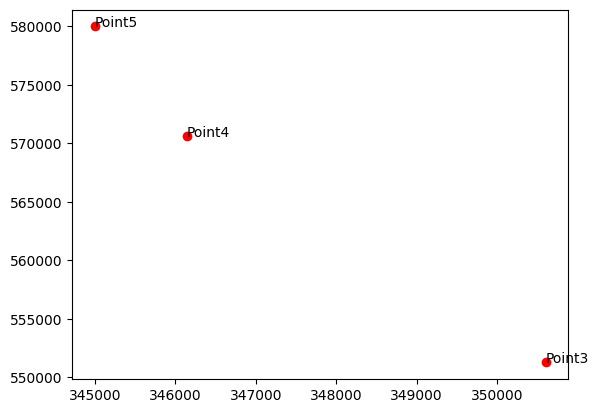

In [36]:
import matplotlib.pyplot as plt

plt.plot(easting_p3,northing_p3, 'ro')
plt.plot(easting_p4,northing_p4, 'ro')
plt.plot(easting_p5,northing_p5, 'ro')

plt.text(easting_p3,northing_p3, 'Point3')
plt.text(easting_p4,northing_p4, 'Point4')
plt.text(easting_p5,northing_p5, 'Point5')

plt.show()

<div class="alert alert-block alert-info">
<b>Q1.3</b> Find the meridian convergence at point 3 and explain the sign of the angle.
</div>

The module `utils` provides you with a function to calculate the meridian convergence called `E_N_to_C`. An example of how to use this function: 
```
meridian_convergence = utils.E_N_to_C(easting,northing,a, b, e0, n0, f0, PHI0)
```

In [15]:
meridian_convergence_p3 = utils.E_N_to_C(easting_p3, northing_p3, a, b, e0, n0, f0, PHI0)
print("The meridian convergence at Point 3 is %f [d.degrees]"%meridian_convergence_p3)

The meridian convergence at Point 3 is -0.629179 [d.degrees]


Use the space below to comment on the sign of the meridian convergence sign.

<div class="alert alert-block alert-info">
<b>Q1.4</b> Find the $t-T$  correction for the line between points 3 and 4 and for the line between points 4 and 3. Explain why the two values of the $t-T$ correction differ.
</div>

The module `utils` provides you with a function to calculate the $t-T$ correction, called `E_N_to_t_minus_T`. An example of how to use this function: 
```
t_T = utils.E_N_to_t_minus_T(easting_point1, northing_point1, easting_point2, northing_point2, a, b, e0, n0, f0, PHI0)
```

Do the $t-T(3-4)$ calculation first

In [16]:
t_T_p3p4 = utils.E_N_to_t_minus_T(easting_p3, northing_p3, easting_p4, northing_p4, a, b, e0, n0, f0, PHI0)
print('The t-T correction between points 3 and 4 is %.10f [d.deg]'%t_T_p3p4)

The t-T correction between points 3 and 4 is 0.0006916520 [d.deg]


Then, the $t-T(4-3)$

In [17]:
t_T_p4p3 = utils.E_N_to_t_minus_T(easting_p4, northing_p4, easting_p3, northing_p3, a, b, e0, n0, f0, PHI0)
print('The t-T correction between points 3 and 4 is %.10f [d.deg]'%t_T_p4p3)

The t-T correction between points 3 and 4 is -0.0007118655 [d.deg]


<div class="alert alert-block alert-info">
<b>Q1.5</b> Find the projected azimuth $\alpha$ (called true azimuth) of the line between points 3 and 4.
</div>

The module `utils` provides you with a function to calculate the $\alpha$ true azimuth, called `TrueAzimuth`. An example of how to use this function: 
```
alpha = utils.TrueAzimuth(easting_p1, northing_p1, easting_p2, northing_p2, a, b, e0, n0, f0, PHI0)
```


In [18]:
alpha_p3p4 = utils.TrueAzimuth(easting_p3, northing_p3, easting_p4, northing_p4, a, b, e0, n0, f0, PHI0)
print("The projected azimuth of the line between Points 3 and 4 = %f [d.deg]"%alpha_p3p4)

The projected azimuth of the line between Points 3 and 4 = 346.373564 [d.deg]


<div class="alert alert-block alert-info">
<b>Q1.6</b> Find the projected clockwise angle between the line 3-4 and the line 3-5.
</div>

In [19]:
# calculate the true azimuthfor the line p35
alpha_p3p5 = utils.TrueAzimuth(easting_p3, northing_p3, easting_p5, northing_p5, a, b, e0, n0, f0, PHI0)
print("The projected azimuth of the line between Points 3 and 4 = %f [d.deg]"%alpha_p3p5)

# the projected angle between the two lines, applying the second term corrections
t_T_p3p5 = utils.E_N_to_t_minus_T(easting_p3, northing_p3, easting_p5, northing_p5, a, b, e0, n0, f0, PHI0)

# see lecture 10 for this correction : wp = we + t-T(3-5) - t-T(3-4)
angle_p3p4_p3p5 = alpha_p3p5 - alpha_p3p4 + (t_T_p3p5 - t_T_p3p4)
print("The projected angle between lines L34 and L35 = %f [d.deg]"%angle_p3p4_p3p5)

The projected azimuth of the line between Points 3 and 4 = 348.325565 [d.deg]
The projected angle between lines L34 and L35 = 1.952344 [d.deg]


### Part 2 : The direct geodetic problem on the plane

<div class="alert alert-block alert-info">
<b> Find the geodetic coordinates of point 6 </b> knowing that the ellipsoidal distance between point 1 and point 6 is <b>22.5 km</b> and the ellipsoidal azimuth (equal to the projected azimuth in conformal projections) of line 1-6 is <b>49.78 degrees</b>. The geodetic coordinates of point 1 are given in Part 1. Follow the iterative algorithm described in the notes of lecture 10 to answer this question.
</div>

**Write a function for the direct problem that takes the Northing, Easting, azimuth, distance and returns the target position**

In [20]:
def direct_problem(N_A,E_A,alpha_AB,distance_AB):
    '''
    Direct problem: given the location of the point A(Northing,Easting),
    the azimuth AB (alpha) and the projected distance AB (distance_AB)
    derive the location of the point B. 
    '''
    alpha = np.deg2rad(alpha_AB)
    N_B = N_A + distance_AB*np.cos(alpha)
    E_B = E_A + distance_AB*np.sin(alpha)
    return N_B,E_B

Input the parameters distance and azmith between points 1 and 6.

In [21]:
# ellipsoidal distance [meters]
distance_p1p6 =  22.5*1e3
# azimuth in decimal degrees
azimuth_p1p6 = 49.78

Using the iterative algorithm introduced in Lecture 10, use a `for` loop with a tolerance of 1mm for the convergence.

In [22]:
# maximum iteration
max_it = 10
# tolerance for convergence
tolerance = 1e-6
# initial values for unknown Point 6
northing_init,easting_init = 0,0
# meridian convergence at Point 1
meridian_convergence_p1 = utils.E_N_to_C(easting_p1, northing_p1, a, b, e0, n0, f0, PHI0)

for i in range(max_it):
    print("Iteration ",i+1)
    # calculate the grid azimuth of the chord
    t = azimuth_p1p6 - meridian_convergence_p1
    # first iteration
    if (i==0):
        # we use the point scale factor at p1
        line_scale_factor_p1p6 = local_scale_factor_p1
        # we ignore the t_T correction
        t_T_p1p6 = 0
    else:
        local_scale_factor_p6 = utils.E_N_to_LSF(easting_p6, northing_p6, a, b, e0, n0, f0, PHI0)
        line_scale_factor_p1p6 = (local_scale_factor_p1+local_scale_factor_p6)/2
        t_T_p1p6 = utils.E_N_to_t_minus_T(easting_p1, northing_p1, easting_p6, northing_p6, a, b, e0, n0, f0, PHI0)
    
    # apply the t_T correction
    t = t + t_T_p1p6
    # calculate the projected distance
    proj_distance_p1p6 = line_scale_factor_p1p6*distance_p1p6
    # forward mapping
    northing_p6,easting_p6 = direct_problem(northing_p1,easting_p1,t,proj_distance_p1p6)
    # calculate the difference from the previous iteration
    diff_northing = northing_p6 - northing_init 
    diff_easting = easting_p6 - easting_init
    if ((diff_easting>tolerance) o  r (diff_northing>tolerance)):
        northing_init,easting_init = northing_p6,easting_p6
    else:
        print("----")
        print('convergence at iteration',i+1)
        print('Northing P6 = %f [meters], Easting P6=%f [meters]'%(northing_p6,easting_p6))
        break

Iteration  1
Iteration  2
Iteration  3
Iteration  4
----
convergence at iteration 4
Northing P6 = 305773.821898 [meters], Easting P6=484264.375302 [meters]


In [5]:
import numpy as np
Amat=np.array([[1,2,3],[4,5,6],[7,8,9]])
bvect = np.array([1,2,3])
c=Amat.dot(bvect)
print(Amat)
print(bvect)
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
[14 32 50]


In [32]:
lat_p6,lon_p6=p(easting_p6, northing_p6,inverse=True)
print('Geodetic coordinates Latitude P6 = %f [deg], Longitude P6=%f [deg]'%(lat_p6,lon_p6))

Geodetic coordinates Latitude P6 = -0.754499 [deg], Longitude P6=52.642803 [deg]


### Part 3 Three-dimensional Helmert transformation

The seven parameters of a 3D Helmert transformation from reference frame A to reference frame B have the following values:

$$
T_{X}=\textrm{DD} \, \textrm{cm}, \, T_{Y}=-\textrm{MM} \, \textrm{cm}, T_{Z}=5 \, \textrm{cm}, \\
\alpha_{X}=-2.1^{\prime\prime}, \, \alpha_{Y}=5.9^{\prime\prime}, \, \alpha_{Z}=1^{\prime\prime}, \\
s=2.1 \, \textrm{ppm},
$$

where $T_x,T_y,Tz$ are the translation parameters, $\alpha_X,\alpha_Y,\alpha_Z$ are the rotation angles about the $X,Z and Z$ coordinate axes and $s$ is the scale parameter. Knowing that a geodetic station has the following geocentric coordinates in reference frame A:

$$
X_A=4033463.66 \textrm{m}, \\
Y_A=23662.54 \textrm{m}, \\
Z_A=4924305.21 \textrm{m},
$$

<div class="alert alert-block alert-info">
Find the corresponding coordinates of the station in reference frame B.
</div>

In [24]:
# transformation parameters [meters]
TX = 0.06
TY =-0.06
TZ =0.05

# Rotation angles [seconds]
alphaX = -2.1
alphaY = 5.9
alphaZ = 1

# scale
s = 2.1*1e-6

In [25]:
# position vector of point A [meters]
XA = 4033463.66
YA = 23662.54
ZA = 4924305.21
xyz_A = np.array([XA,YA,ZA])

Using a 7-parameters transformation:


$$
\begin{pmatrix} x_B \\ y_B \\ z_B\end{pmatrix} =\begin{pmatrix} 1+s & -\theta_z & \theta_y\\ \theta_z & 1+s & -\theta_x\\ -\theta_y & \theta_x & 1+s \end{pmatrix}\begin{pmatrix} x_A \\ y_A \\ z_A\end{pmatrix}+ \begin{pmatrix} T_x \\ T_y \\ T_z\end{pmatrix}
$$

Define the rotation matrix `Rot`

In [26]:
# Store rotation values in array convert to decimal degrees
Rot = np.array([np.deg2rad(alphaX/3600),np.deg2rad(alphaY/3600),np.deg2rad(alphaZ/3600)])

# Rotation matrix
RotationMat = np.array([[1+s,-Rot[2],Rot[1]],
                    [Rot[2],1+s,-Rot[0]],
                    [-Rot[1],Rot[0],1+s]]) 

Define the translation vector

In [27]:
TranslationMat = np.array([TX,TY,TZ])

In [28]:
RotationMat = np.array([[1+s,-Rot[2],Rot[1]],
                    [Rot[2],1+s,-Rot[0]],
                    [-Rot[1],Rot[0],1+s]]) 

The solution is: 

In [29]:
pB = RotationMat.dot(xyz_A)+TranslationMat

In [30]:
print("X - Point B: %f"%(pB[0]))
print("Y - Point B: %f"%(pB[1]))
print("Z - Point B: %f"%(pB[2]))

X - Point B: 4033612.930416
Y - Point B: 23732.219256
Z - Point B: 4924199.986907
